In [3]:
from keras.datasets import imdb


(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)
# keras의 imdb에서 빈번한 단어 10000개 사용
# data : 리뷰 목록, labels: 긍정or부정(1,0)

In [4]:
word_index = imdb.get_word_index()
# imdb 데이터셋에서 워드인덱스를 가져옴
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
# 단어와 정수인덱스 매핑위해 뒤집음

decoded_review = ' '.join([reverse_word_index.get(i-3, "?") for i in train_data[0]])
# Index 0,1,2 : Padding, 문서시작, 사전에 없음
# 따라서 인덱스 i에서 3을 빼어 문자열을 이어 붙인다.

In [5]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        #원핫 벡터를 만들기에 results[i]에 대해 1로 만든다.
    return results

    #numpy를 통해 모든 데이터가 0인 sequences 크기의 dimension 차원의 행렬를 만들고

x_train = vectorize_sequences(train_data)
# imdb에서 가져온 훈련데이터를 vectorize_sequence를 통해 벡터로 변환
x_test = vectorize_sequences(test_data)
# imdb에서 가져온 테스트 데이터를 vectorize_sequence를 통해 벡터로 변환

In [6]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
# labels는 data변수와 다르게 0, 1로 구성되어있기에 numpy를 이용해 바로 변환이 가능하다

In [7]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
# 뉴럴네트워크의 레이어를 정한다. 입력값의 크기는 (10000,)
# 16, 16, 아웃풋은 1이다.

W0729 10:39:37.981803 140679286835008 deprecation_wrapper.py:119] From /home/aaronroh/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0729 10:39:37.998726 140679286835008 deprecation_wrapper.py:119] From /home/aaronroh/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0729 10:39:38.001456 140679286835008 deprecation_wrapper.py:119] From /home/aaronroh/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [8]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

W0729 10:39:38.041460 140679286835008 deprecation_wrapper.py:119] From /home/aaronroh/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0729 10:39:38.059816 140679286835008 deprecation_wrapper.py:119] From /home/aaronroh/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0729 10:39:38.063719 140679286835008 deprecation.py:323] From /home/aaronroh/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])
# 옵티마이저는 확률이 출력되므로 binary_crossentropy를 쓰는게 적합하다고 하였다

In [10]:
from keras import losses
from keras import metrics

In [11]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

#기존 훈련데이터에서 쪼개서 훈련 -> [훈련|테스트]를 만든다.

In [12]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))
# 위에서 쪼갠 훈련데이터로 partial 데이터를 통해 모델을 에포크 20으로 훈련시키고 x_val, y_val를 통해 검증한다
# model.fit()은 History를 반환한다.
history_dict = history.history
history_dict.keys()
# 훈련과 검증을 통해 나온 손실률, 정확도가 history_dict에 담긴다.

W0729 10:39:38.254419 140679286835008 deprecation_wrapper.py:119] From /home/aaronroh/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.4977 - acc: 0.7943 - val_loss: 0.3720 - val_acc: 0.8717
Epoch 2/20
15000/15000 [==============================] - 1s 63us/step - loss: 0.2959 - acc: 0.9043 - val_loss: 0.2991 - val_acc: 0.8908
Epoch 3/20
15000/15000 [==============================] - 1s 70us/step - loss: 0.2160 - acc: 0.9283 - val_loss: 0.3085 - val_acc: 0.8716
Epoch 4/20
15000/15000 [==============================] - 1s 65us/step - loss: 0.1741 - acc: 0.9434 - val_loss: 0.2826 - val_acc: 0.8849
Epoch 5/20
15000/15000 [==============================] - 1s 63us/step - loss: 0.1413 - acc: 0.9543 - val_loss: 0.2862 - val_acc: 0.8853
Epoch 6/20
15000/15000 [==============================] - 1s 66us/step - loss: 0.1142 - acc: 0.9653 - val_loss: 0.3090 - val_acc: 0.8809
Epoch 7/20
15000/15000 [==============================] - 1s 64us/step - loss: 0.0969 - acc: 0.9709 - val_loss: 0.3148 - val_ac

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [13]:
import matplotlib.pyplot as plt

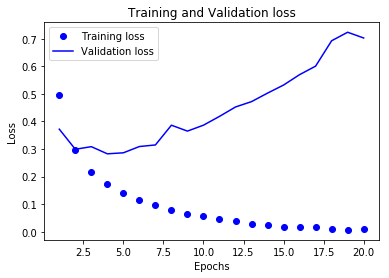

In [14]:
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title("Training and Validation loss")

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 위에서 이룬 partial_x|y_train 에 대한 자료와 x|y_val 에 대한 자료를 차트로 나타내었다.

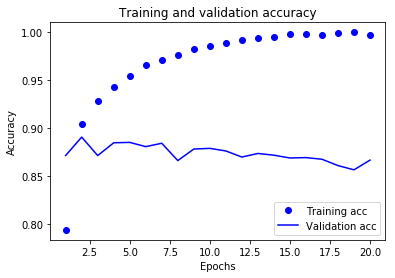

In [15]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

# 트레이닝 정확도는 에포크가 클수록 높아진다.
# 에포크가 클수록 검증률은 점차 낮아지는 것으로 보인다.

In [16]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
# 에포크 4로 x_train과 y_train으로 훈련

Epoch 1/4
25000/25000 [==============================] - 1s 49us/step - loss: 0.4749 - acc: 0.8216
Epoch 2/4
25000/25000 [==============================] - 1s 43us/step - loss: 0.2658 - acc: 0.9097
Epoch 3/4
25000/25000 [==============================] - 1s 42us/step - loss: 0.1983 - acc: 0.9296
Epoch 4/4
25000/25000 [==============================] - 1s 45us/step


In [17]:
results
# 훈련된 데이터에 대한 x_test, y_test로의 테스트

[0.3246199953365326, 0.87292]